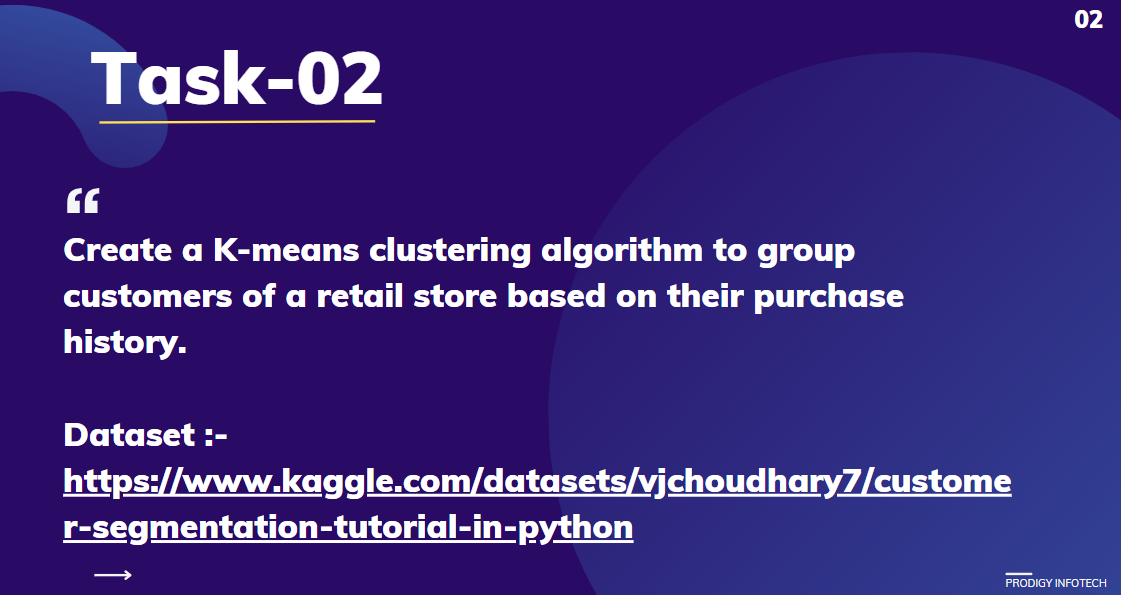

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

In [14]:
df = pd.read_csv('Mall_Customers.csv')

df.drop(["CustomerID"], axis=1, inplace=True)

print(df.head())
print(df.shape)
print(df.isnull().sum())
print(df.duplicated().sum())
print(df.dtypes)
print(df.describe())

print(df.select_dtypes('int64').corr())

   Gender  Age  Annual Income (k$)  Spending Score (1-100)
0    Male   19                  15                      39
1    Male   21                  15                      81
2  Female   20                  16                       6
3  Female   23                  16                      77
4  Female   31                  17                      40
(200, 4)
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64
0
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object
              Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000          200.000000              200.000000
mean    38.850000           60.560000               50.200000
std     13.969007           26.264721               25.823522
min     18.000000           15.000000                1.000000
25%     28.750000           41.500000               34

In [15]:
def plot_distributions(data, features):
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.histplot(data[feature], bins=20, kde=True)
        plt.title(f'Distribution of {feature}')
    plt.tight_layout()
    plt.show()

def plot_violinplots(data, features, category):
    plt.figure(figsize=(15, 6))
    for i, feature in enumerate(features, 1):
        plt.subplot(1, 3, i)
        sns.violinplot(x=data[feature], y=data[category])
        plt.title(f'Violin Plot of {feature} by {category}')
    plt.tight_layout()
    plt.show()

def plot_countplot(data, category):
    plt.figure(figsize=(15, 6))
    sns.countplot(data=data, y=category)
    plt.title(f'Count Plot of {category}')
    plt.show()

def plot_age_distribution(data):
    age_bins = [(18, 25), (26, 35), (36, 45), (46, 55), (56, np.inf)]
    age_labels = ['18-25', '26-35', '36-45', '46-55', '55+']
    age_counts = [len(data[(data['Age'] >= low) & (data['Age'] <= high)]) for low, high in age_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=age_labels, y=age_counts, palette="mako")
    plt.title("Number of Customers in Age Groups")
    plt.xlabel("Age Group")
    plt.ylabel("Number of Customers")
    plt.show()

def plot_spending_score_distribution(data):
    score_bins = [(1, 20), (21, 40), (41, 60), (61, 80), (81, 100)]
    score_labels = ['1-20', '21-40', '41-60', '61-80', '81-100']
    score_counts = [len(data[(data['Spending Score (1-100)'] >= low) & (data['Spending Score (1-100)'] <= high)]) for low, high in score_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=score_labels, y=score_counts, palette="mako")
    plt.title("Distribution of Spending Scores")
    plt.xlabel("Spending Score Range")
    plt.ylabel("Number of Customers")
    plt.show()

def plot_annual_income_distribution(data):
    income_bins = [(0, 30), (31, 60), (61, 90), (91, 120), (121, 150)]
    income_labels = ["$0-30k", "$31-60k", "$61-90k", "$91-120k", "$121-150k"]
    income_counts = [len(data[(data['Annual Income (k$)'] >= low) & (data['Annual Income (k$)'] <= high)]) for low, high in income_bins]

    plt.figure(figsize=(15, 6))
    sns.barplot(x=income_labels, y=income_counts, palette="mako")
    plt.title("Annual Income Distribution")
    plt.xlabel("Income Range (k$)")
    plt.ylabel("Number of Customers")
    plt.show()

def perform_kmeans_clustering(data, features, n_clusters):
    X = data[features].values
    wcss = []
    for k in range(1, 11):
        kmeans = KMeans(n_clusters=k, init="k-means++")
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
    
    plt.figure(figsize=(12, 6))
    plt.plot(range(1, 11), wcss, linewidth=2, color="red", marker="*")
    plt.title("The Elbow Method")
    plt.xlabel("Number of Clusters")
    plt.ylabel("WCSS")
    plt.grid(True)
    plt.show()
    
    kmeans = KMeans(n_clusters=n_clusters)
    labels = kmeans.fit_predict(X)
    plt.figure(figsize=(15, 6))
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="rainbow", marker='o')
    plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='black', marker='x')
    plt.title(f'Clusters of Customers (features: {features[0]} and {features[1]})')
    plt.xlabel(features[0])
    plt.ylabel(features[1])
    plt.grid(True)
    plt.show()


--------------------------------------------------------------------------------------------------------------------------------


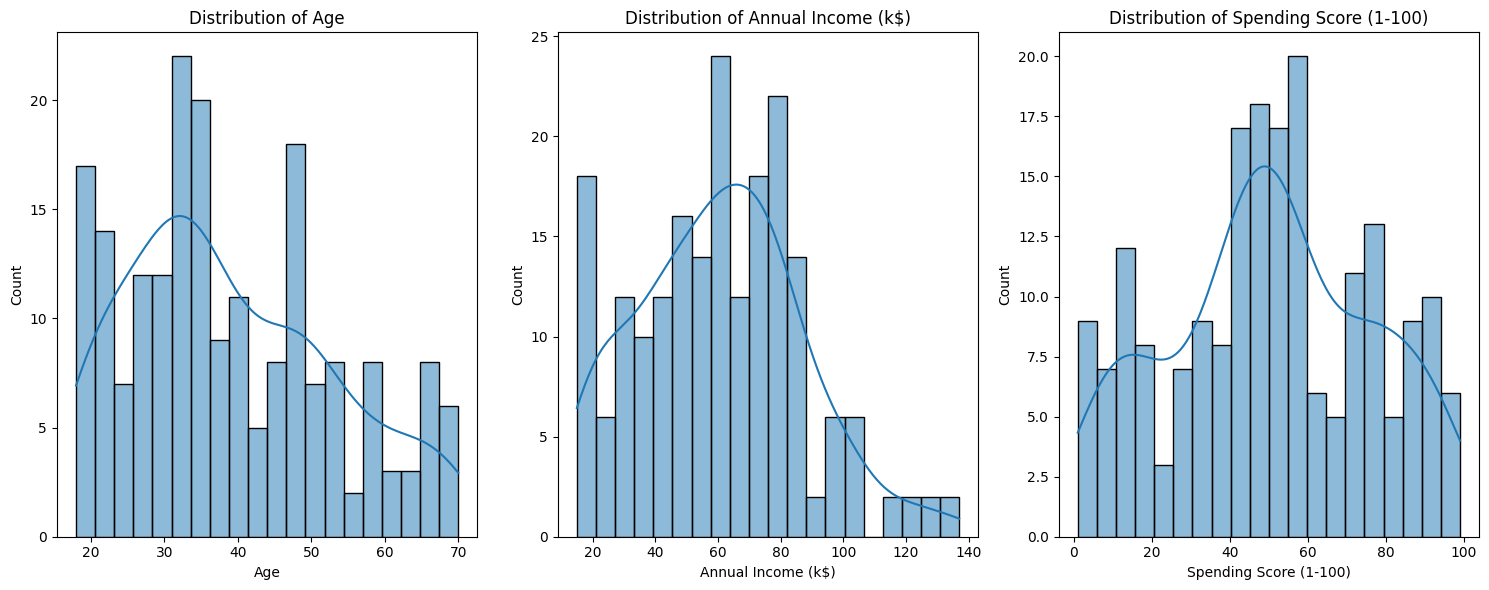

--------------------------------------------------------------------------------------------------------------------------------


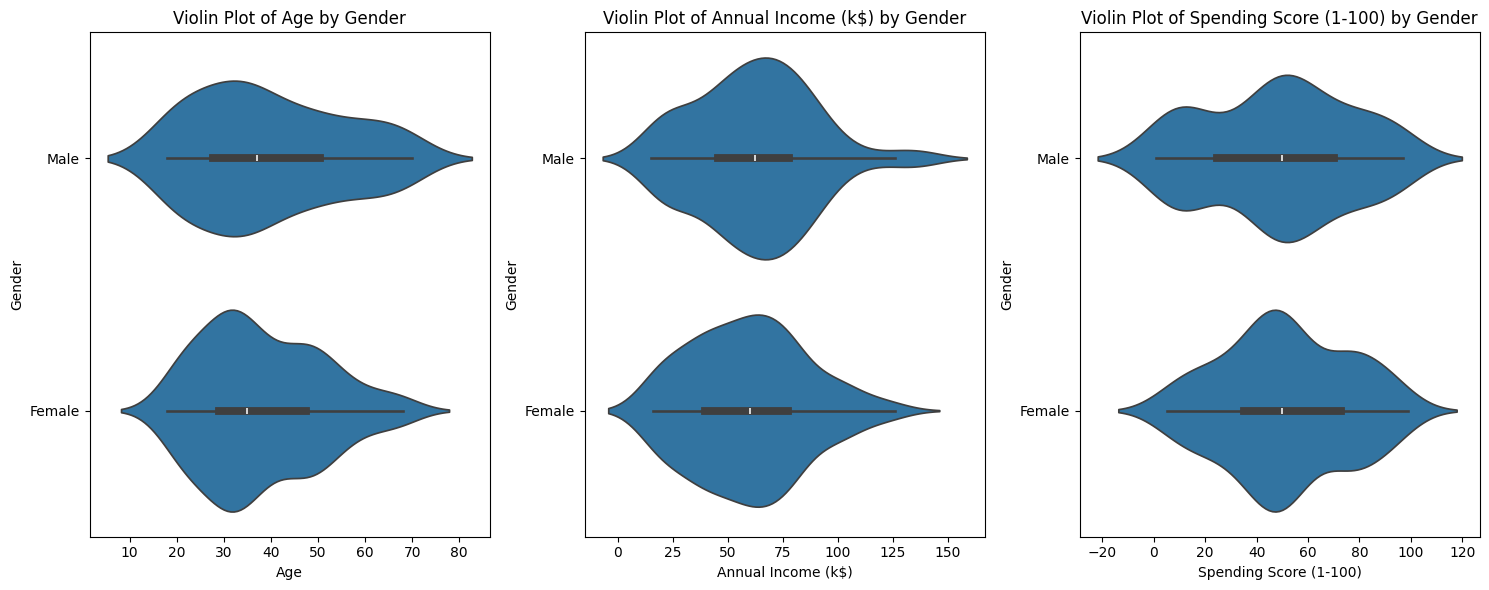

--------------------------------------------------------------------------------------------------------------------------------


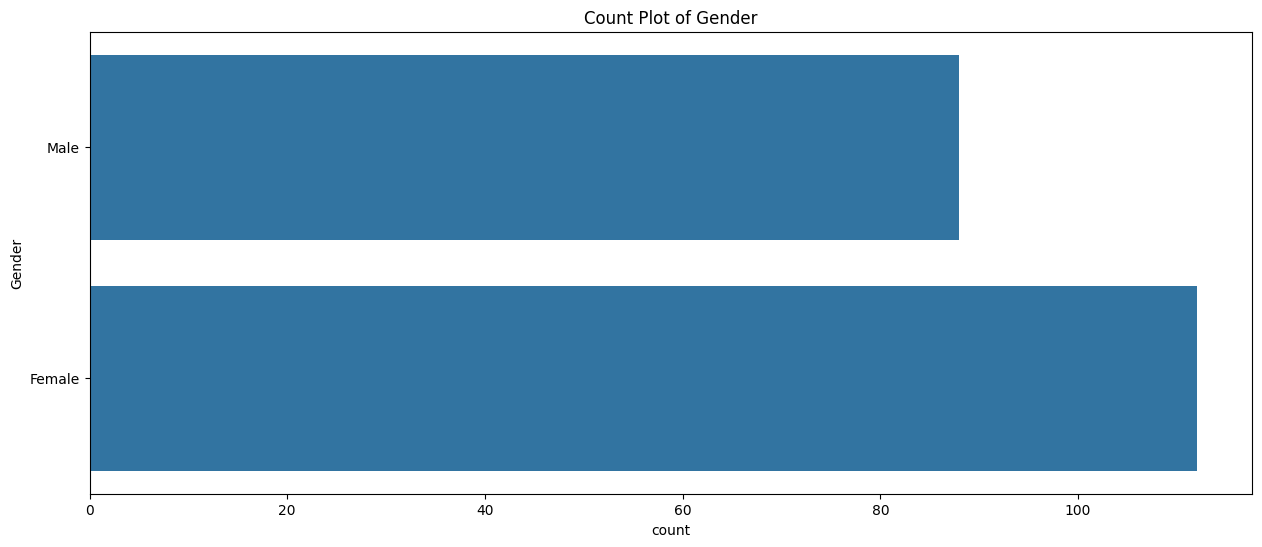

--------------------------------------------------------------------------------------------------------------------------------


C:\Users\PC\AppData\Local\Temp\ipykernel_2184\3150791046.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=age_labels, y=age_counts, palette="mako")


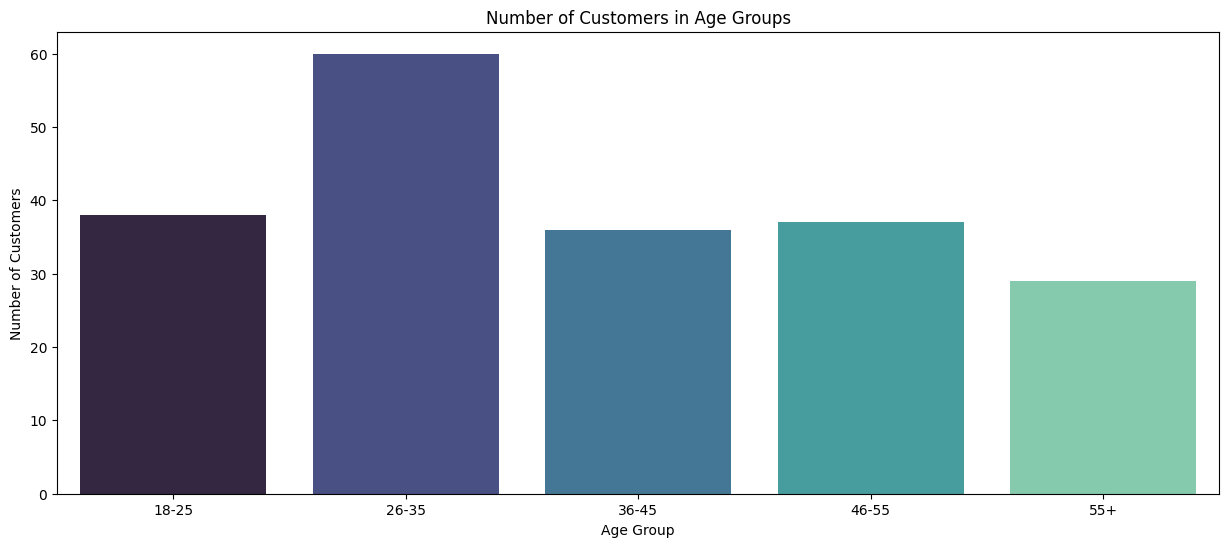

--------------------------------------------------------------------------------------------------------------------------------


C:\Users\PC\AppData\Local\Temp\ipykernel_2184\3150791046.py:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=score_labels, y=score_counts, palette="mako")


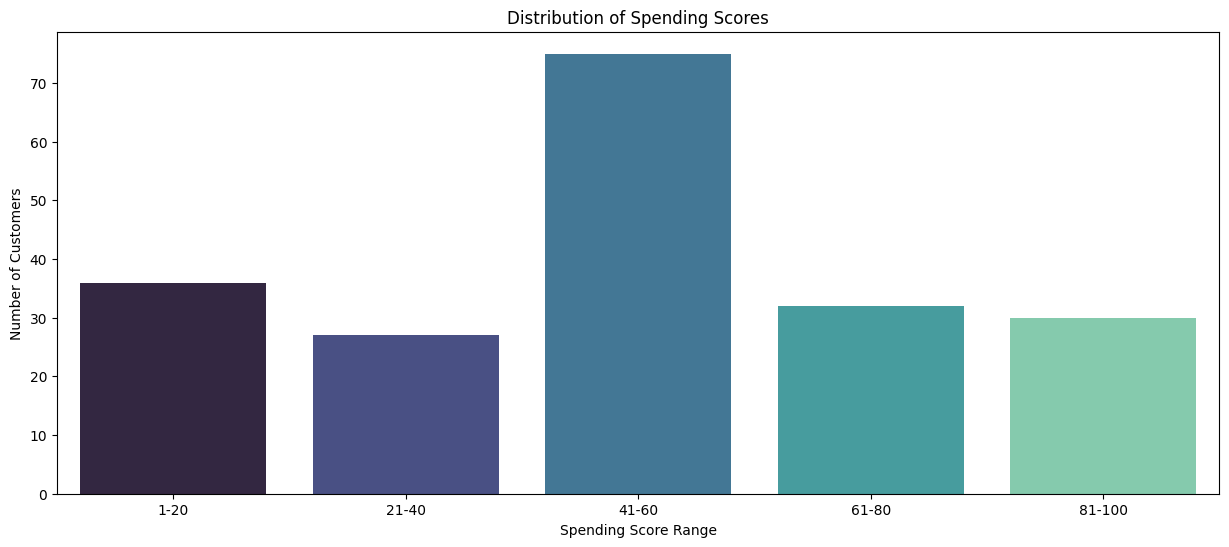

--------------------------------------------------------------------------------------------------------------------------------


C:\Users\PC\AppData\Local\Temp\ipykernel_2184\3150791046.py:55: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=income_labels, y=income_counts, palette="mako")


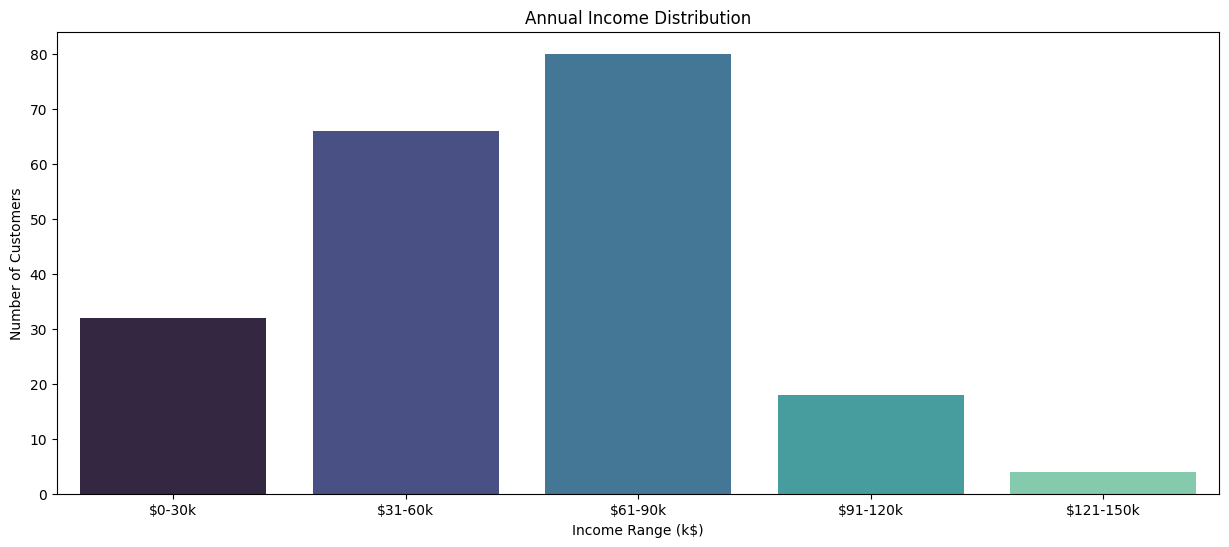

--------------------------------------------------------------------------------------------------------------------------------


In [16]:
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_distributions(df, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'])
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_violinplots(df, ['Age', 'Annual Income (k$)', 'Spending Score (1-100)'], 'Gender')
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_countplot(df, 'Gender')
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_age_distribution(df)
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_spending_score_distribution(df)
print('--------------------------------------------------------------------------------------------------------------------------------')
plot_annual_income_distribution(df)
print('--------------------------------------------------------------------------------------------------------------------------------')

--------------------------------------------------------------------------------------------------------------------------------


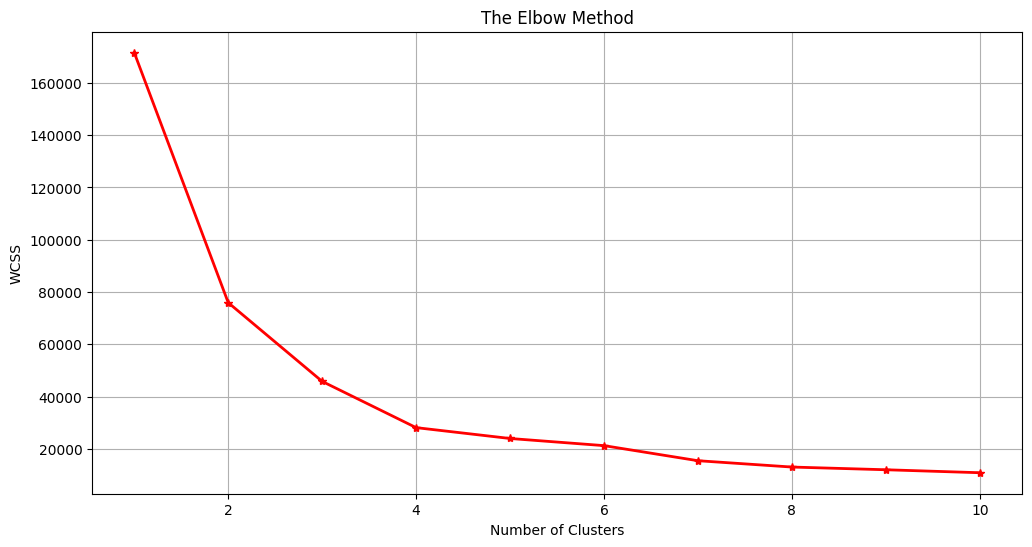

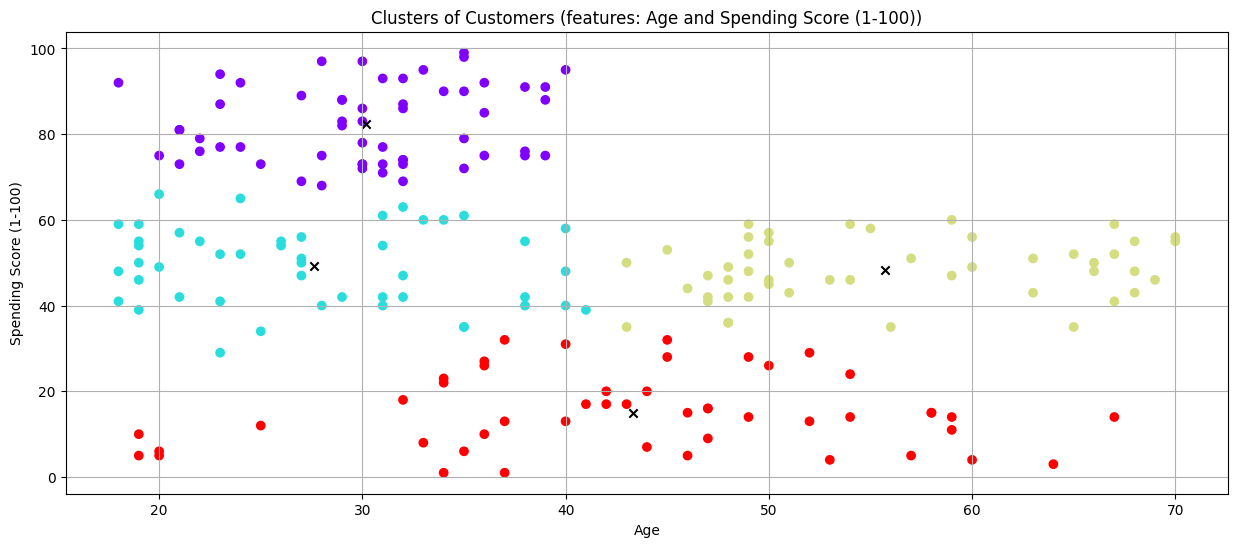

--------------------------------------------------------------------------------------------------------------------------------


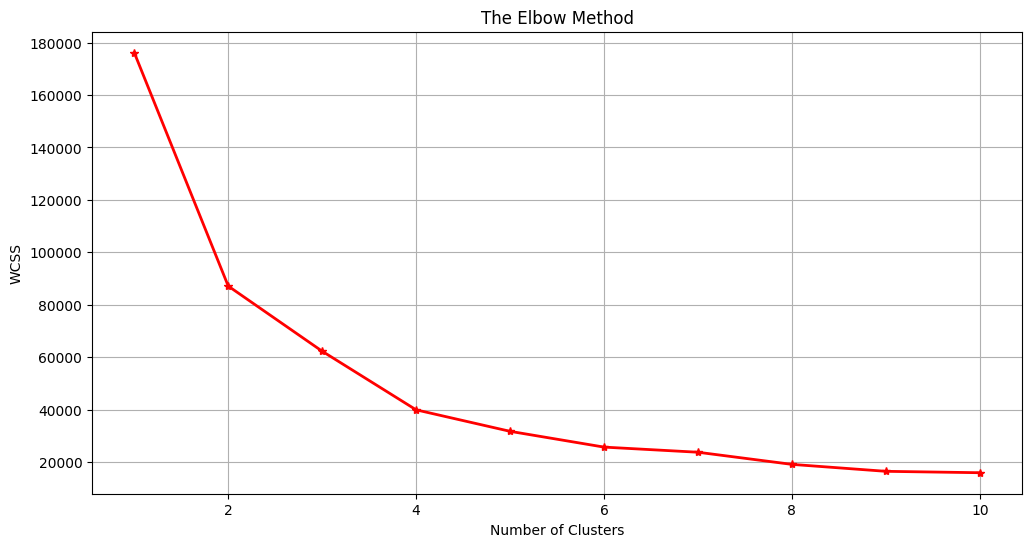

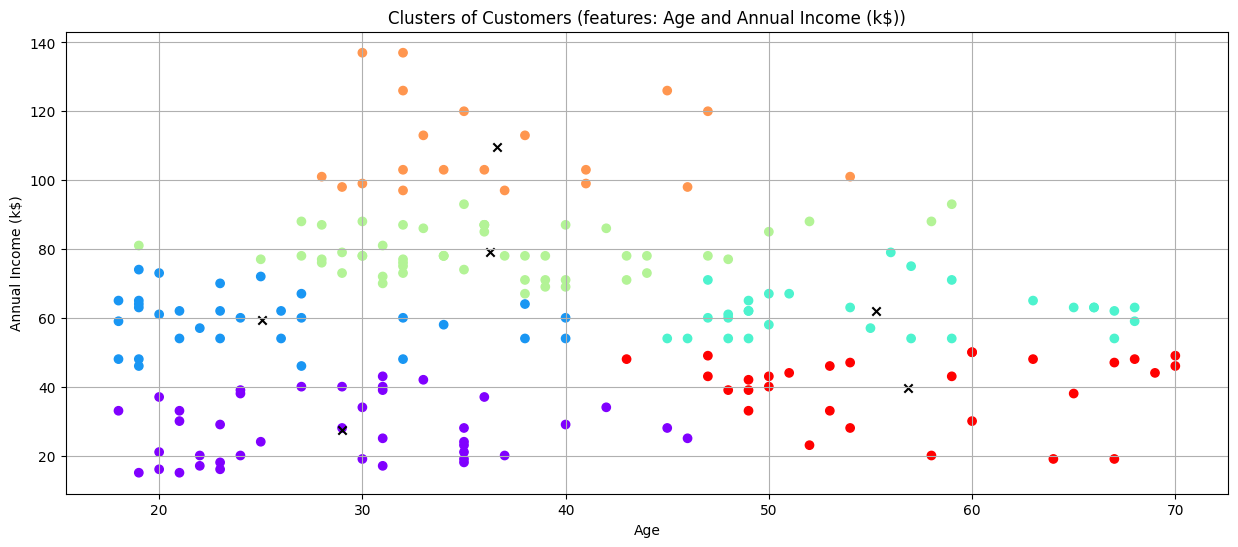

--------------------------------------------------------------------------------------------------------------------------------


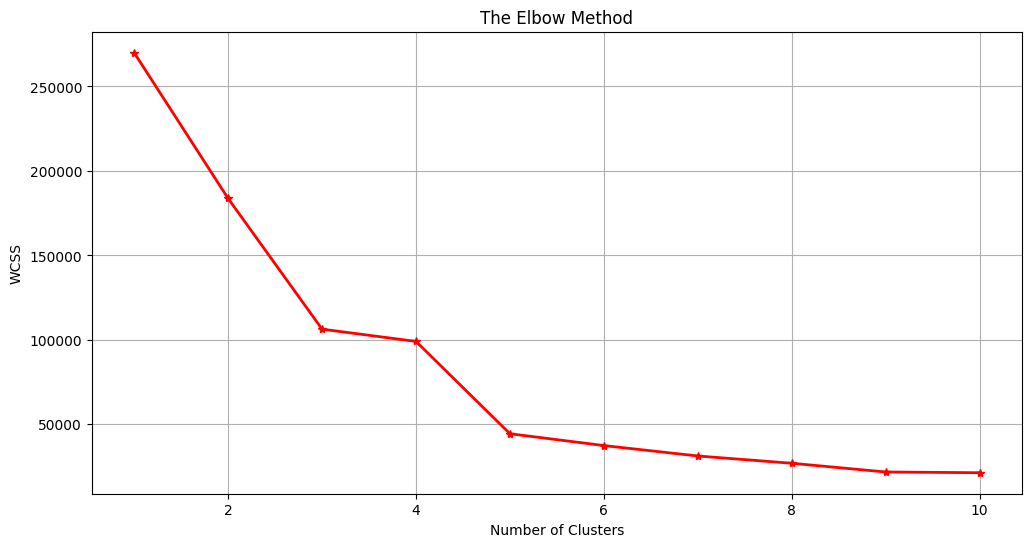

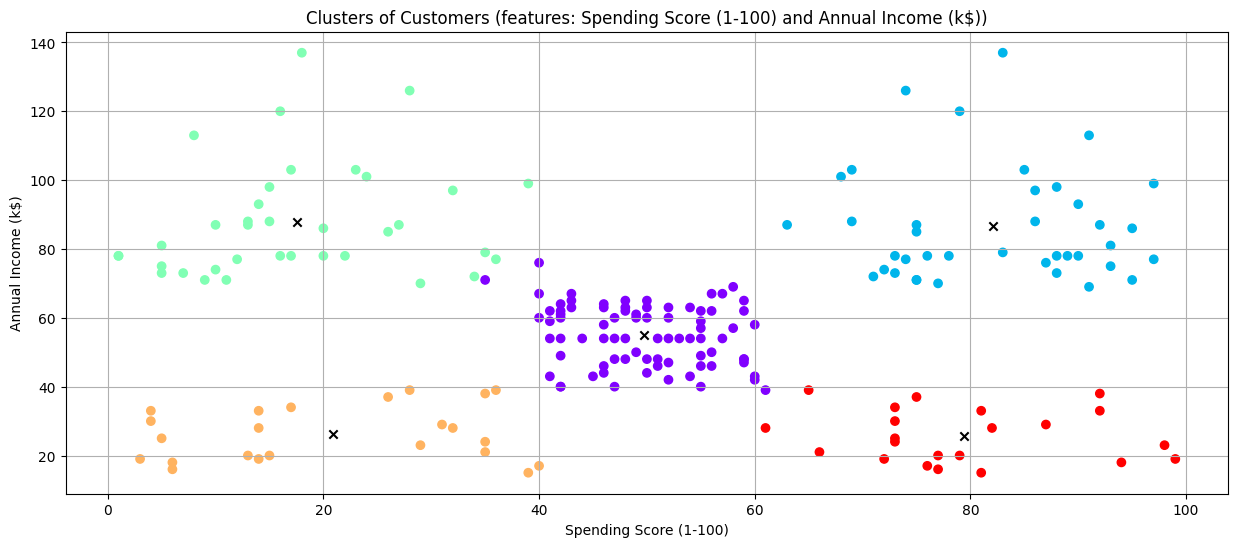

--------------------------------------------------------------------------------------------------------------------------------


In [17]:
print('--------------------------------------------------------------------------------------------------------------------------------')
perform_kmeans_clustering(df, ['Age', 'Spending Score (1-100)'], 4)
print('--------------------------------------------------------------------------------------------------------------------------------')
perform_kmeans_clustering(df, ['Age', 'Annual Income (k$)'], 6)
print('--------------------------------------------------------------------------------------------------------------------------------')
perform_kmeans_clustering(df, ['Spending Score (1-100)', 'Annual Income (k$)'], 5)
print('--------------------------------------------------------------------------------------------------------------------------------')